In [28]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

### 전처리과정
* 데이터 로드
* 데이터 분리( train data, test data)


In [29]:
from sklearn.model_selection import train_test_split
irisd=load_iris()
X_train,x_test,Y_train,y_test=train_test_split(irisd['data'],irisd['target'],random_state=1)

In [30]:
### ML 학습 평가 모델 준비
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [31]:
# 학습/평가
def DTml(_dep):
    dtc=DecisionTreeClassifier(max_depth=_dep)
    dtc.fit(X_train,Y_train)
    pred=dtc.predict(x_test)
    testp=accuracy_score(y_test,pred)
    print("DT depth:",_dep," / 정확도:",testp)
    return (_dep,testp)

In [32]:
#최적화 변수 확인
res=[]
for i in range(1,10):
    res.append(DTml(i))


DT depth: 1  / 정확도: 0.5789473684210527
DT depth: 2  / 정확도: 0.9736842105263158
DT depth: 3  / 정확도: 0.9736842105263158
DT depth: 4  / 정확도: 0.9736842105263158
DT depth: 5  / 정확도: 0.9736842105263158
DT depth: 6  / 정확도: 0.9736842105263158
DT depth: 7  / 정확도: 0.9736842105263158
DT depth: 8  / 정확도: 0.9736842105263158
DT depth: 9  / 정확도: 0.9736842105263158


In [33]:
rdf=pd.DataFrame(data=res,columns=['depth','acc'])
rdf.head()

,depth,acc
0,1,0.578947
1,2,0.973684
2,3,0.973684
3,4,0.973684
4,5,0.973684


In [36]:
#final
dtc=DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

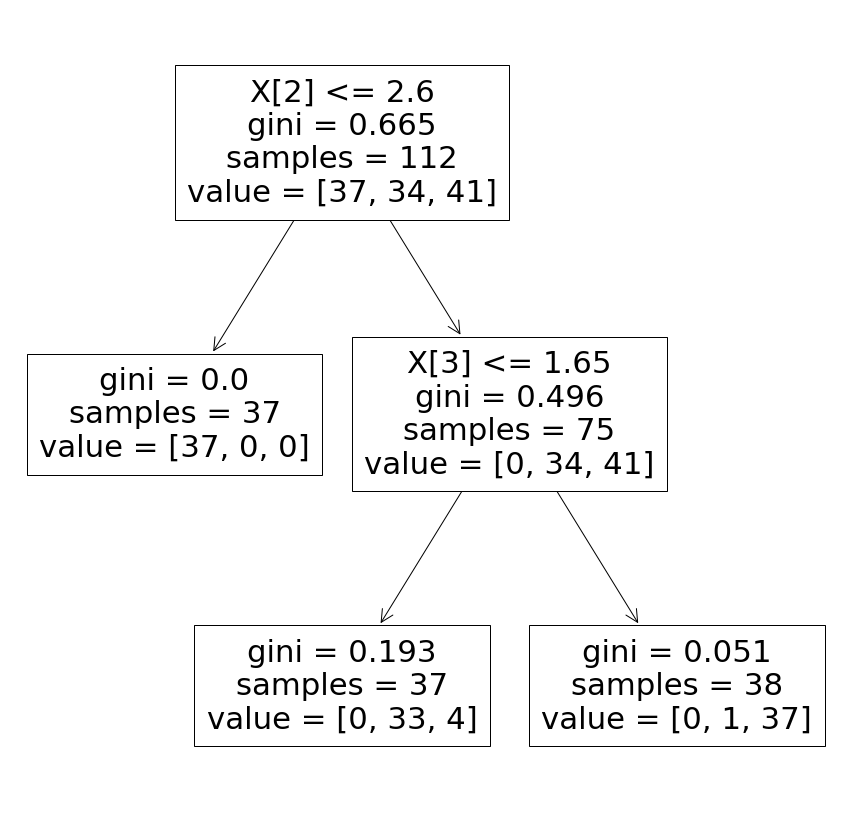

In [37]:
# tree graph 를 통한 직관적 이해
from sklearn.tree import plot_tree
fig,ax=plt.subplots(figsize=(15,15))
plot_tree(dtc)
plt.show()

In [40]:
fimp=dtc.feature_importances_
fimp

array([0.        , 0.        , 0.57023955, 0.42976045])

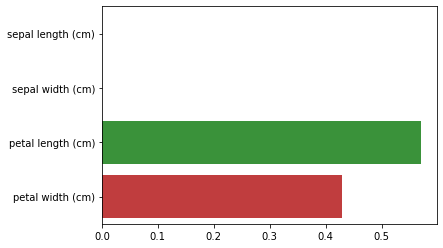

In [43]:
sns.barplot(y=irisd.feature_names,x=fimp)

plt.show()

In [44]:
from sklearn.datasets import make_classification
x_src,y_src=make_classification(n_features=2,
                                n_classes=3,
                                random_state=1,
                                n_redundant=0,
                                n_informative=2,
                                n_clusters_per_class=1
                               )
x_src[:5]

array([[ 0.90394545,  0.35413361],
       [-1.03106689, -1.05752257],
       [-0.84967187,  0.88838944],
       [-1.18068102,  1.18211008],
       [-0.64712399,  0.18317821]])

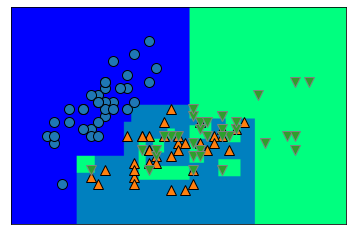

In [45]:
from mglearn.plots import plot_2d_classification
from mglearn import discrete_scatter
import mglearn
X_src=irisdf[['sepal length (cm)','sepal width (cm)']].values
X_src[:5]
Y_src=irisdf[['target']].values
Y_src[:5]
X_train2,x_test2,Y_train2,y_test2=train_test_split(X_src,Y_src)
dtc2=DecisionTreeClassifier()
dtc2.fit(X_train2,Y_train2)
yf2=np.ravel(Y_train2)
plot_2d_classification(dtc2,X_train2,eps=0.5, cm='winter')
discrete_scatter(X_train2[:,0],X_train2[:,1],yf2)
plt.show()